# Assigment #3
Use this file as template

This assigment worh 10.0 point (decimals), but include optional question for extra bonus.

**Tips**:
* Use math.nan for situations where the system will return a undetermined/unkbown number (nan is Not a Number).For example, the factorial of a negative number is not defined, but for this assigment, return math.nan  
* Use math.inf to represent an infinity number
* The **`pass`** statement does nothing in Python, this is used as a placeholder in if statement branches, functions, and classes. Replace it with your code if apply
* It is important to comment your code using the '**`#`**' symbol when appropriate. This helps to explain what each section of code does and makes it easier for others to understand. You must comment every function you create in this assigment (minimun 3 comments per function).


Daniel Knopp


In [117]:
#Include here all library you will need in code
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

## Q1 (1 pt) Factorial number




Create two functions to calculate a factorial. One recursive and one iterative. To ensure that your functions are functioning properly, please follow the test procedure outlined at the end of this section.

**Definition of a Factorial**
The factorial of a number is the multiplication of all the numbers between 1 and the number itself. It is written like this: n!. So the factorial of 2 is 2! (= 1 × 2).


To calculate a factorial you need to know two things:

0! = 1

n! = (n - 1)! × n

The factorial of 0 has value of 1, and the factorial of a number n is equal to the multiplication between the number n and the factorial of n-1.

In [2]:
def factorial_recursion(n):
  return math.nan if type(n) != int or n < 0 else n * factorial_recursion(n-1) if n > 1 else 1


In [7]:
def factorial_iterative(n):
  if type(n) != int or n < 0:
    result = math.nan
  else:
    result = 1
    for i in range(1, n+1):
      result *= i
  return result


### Q1 Test your code

In [34]:
# If you find an issue in the next text code, can you fix it?
values  = [     10,   5,     8, 0,       -1,    "one"] # There was a missing comma between -1 and "one", also I have setup my functions above to correctly handle cases where the wrong data type is passed in
outcome = [3628800, 120, 40320, 1, math.nan, math.nan]
# Added some variables for formatting the print statements to make it easier to read
max_char_idx = len(values) // 10 + 1
max_char_val = max([len(str(val)) for val in values])
max_char_out = max([len(str(out)) for out in outcome])
for index in range(len(values)):
  try:
    val_rec = factorial_recursion(values[index])
    val_ite = factorial_iterative(values[index])
  except:
   print("Test {} failed. Error execute the function with n = {} ".format(index, values[index]))
  else:
    check = True
    # Issue with the logic below is that if the value is nan, it will always fail the test even if the function is correct because (math.nan != math.nan) will return True even if both values are nan (by design)
    # if val_rec != outcome[index] or val_ite != outcome[index]:
    #   check = False
    #   print("Test {} failed with n = {} ".format(index, values[index]))
    # else:
    #    print("Test {} succeded with n = {}".format(index, values[index]))
    if (val_rec == outcome[index] and val_ite == outcome[index]) or all([math.isnan(val_rec), math.isnan(val_ite), math.isnan(outcome[index])]): # Changed logic to read if both values are correct OR if all values are nan, succeed. Else fail
      print(f"Test {index:>{max_char_idx}} succeded with n = {values[index]:>{max_char_val}}, answer = {outcome[index]:>{max_char_out}}") # switched to f-strings for simpler formatting
    else:
      print(f"Test {index:>{max_char_idx}} failed   with n = {values[index]:>{max_char_val}}, answer = {outcome[index]:>{max_char_out}}") # switched to f-strings for simpler formatting


Test 0 succeded with n =  10, answer = 3628800
Test 1 succeded with n =   5, answer =     120
Test 2 succeded with n =   8, answer =   40320
Test 3 succeded with n =   0, answer =       1
Test 4 succeded with n =  -1, answer =     nan
Test 5 succeded with n = one, answer =     nan


## Q2 (1 pt). Implement a Fibonacci Series



**Fibonacci Series** is series of numbers: 0, 1, 1, 2, 3, 5, 8…, fib(n-2), fib(n-1), f(n) where:

* f(0) =0, f(1) = 1
* f(n) = f(n-1) + f(n-2) when n >= 2

Question:
* q2.1 Implemente a recursive function to evaluate fibonacci(5),fibonacci(50) and fibonacci(500). It is ok if your code are not able to calculate this problem, just mention the error (stackoverflow)
* q2.2 Discuss the complexity of the calculation (2-3 paragraphs).
* q2.3 Recursion is not great here. How can improve the performance. Discuss this solution in 3-4 paragraph (just text). You can support your discussion with graphs and/or images.



In [35]:
#q2.1 your Fibonacci recursive function here
def fibonacci(n):
  return math.nan if type(n) != int or n < 0 else n if n < 2 else fibonacci(n-1) + fibonacci(n-2)

###Testing your code

In [38]:
print("Calculatint Fibonacci(5)..")
print(fibonacci(5))

print("Calculatint Fibonacci(50)..")
print(fibonacci(50))

print("Calculatint Fibonacci(500)..")
print(fibonacci(500))



Calculatint Fibonacci(5)..
5
Calculatint Fibonacci(50)..


KeyboardInterrupt: 

<div class="alert alert-block alert-info">
For the above code, I didn't get a stack overflow error but I instead did a keyboard interrupt after 28mins of computing F(50).
</div>

<div class="alert alert-block alert-info">
<b>Q2.2 Response Here:</b>

The complexity of calculating the Fibonacci sequence using a recursive function is O(2^n). This is because for each calculation of F(n) we must also calculate the 2 previous numbers F(n-1) and F(n-2) and for each of those we also need to compute their 2 previous numbers until we arrive at the base F(0) and F(1). This results in exponential growth in time complexity as we increase n. Below I created a text visualization of how this process works (I'm only displaying the computatins for n=8 in the output below). This output shows the ever growing tree of recursive calles to compute the Fibonacci number for n=8. Each level is a specific F(n) computation and all the 2 previous number calculations each level calls is indented one more level. This process repeats until you get the full tree of computations that must occur to calculate the Fibonacci sequence recursively. I have also plotted a histogram that demonstrates the inefficiency of this method by highlighting the amount of repeated work that is done for calculating a few Fibonacci numbers. As you can see, the number of duplicate calculations gets very large as n increases - showing the exponential growth of the time complexity of the function.
</div>

+--- Calculate F(8)
| +--- Calculate F(7)
| | +--- Calculate F(6)
| | | +--- Calculate F(5)
| | | | +--- Calculate F(4)
| | | | | +--- Calculate F(3)
| | | | | | +--- Calculate F(2)
| | | | | | | +--- Calculate F(1)
| | | | | | | | = 1
| | | | | | | +--- Calculate F(0)
| | | | | | | | = 0
| | | | | | | = 1
| | | | | | +--- Calculate F(1)
| | | | | | | = 1
| | | | | | = 2
| | | | | +--- Calculate F(2)
| | | | | | +--- Calculate F(1)
| | | | | | | = 1
| | | | | | +--- Calculate F(0)
| | | | | | | = 0
| | | | | | = 1
| | | | | = 3
| | | | +--- Calculate F(3)
| | | | | +--- Calculate F(2)
| | | | | | +--- Calculate F(1)
| | | | | | | = 1
| | | | | | +--- Calculate F(0)
| | | | | | | = 0
| | | | | | = 1
| | | | | +--- Calculate F(1)
| | | | | | = 1
| | | | | = 2
| | | | = 5
| | | +--- Calculate F(4)
| | | | +--- Calculate F(3)
| | | | | +--- Calculate F(2)
| | | | | | +--- Calculate F(1)
| | | | | | | = 1
| | | | | | +--- Calculate F(0)
| | | | | | | = 0
| | | | | | = 1
| | | | | +--- Calcu

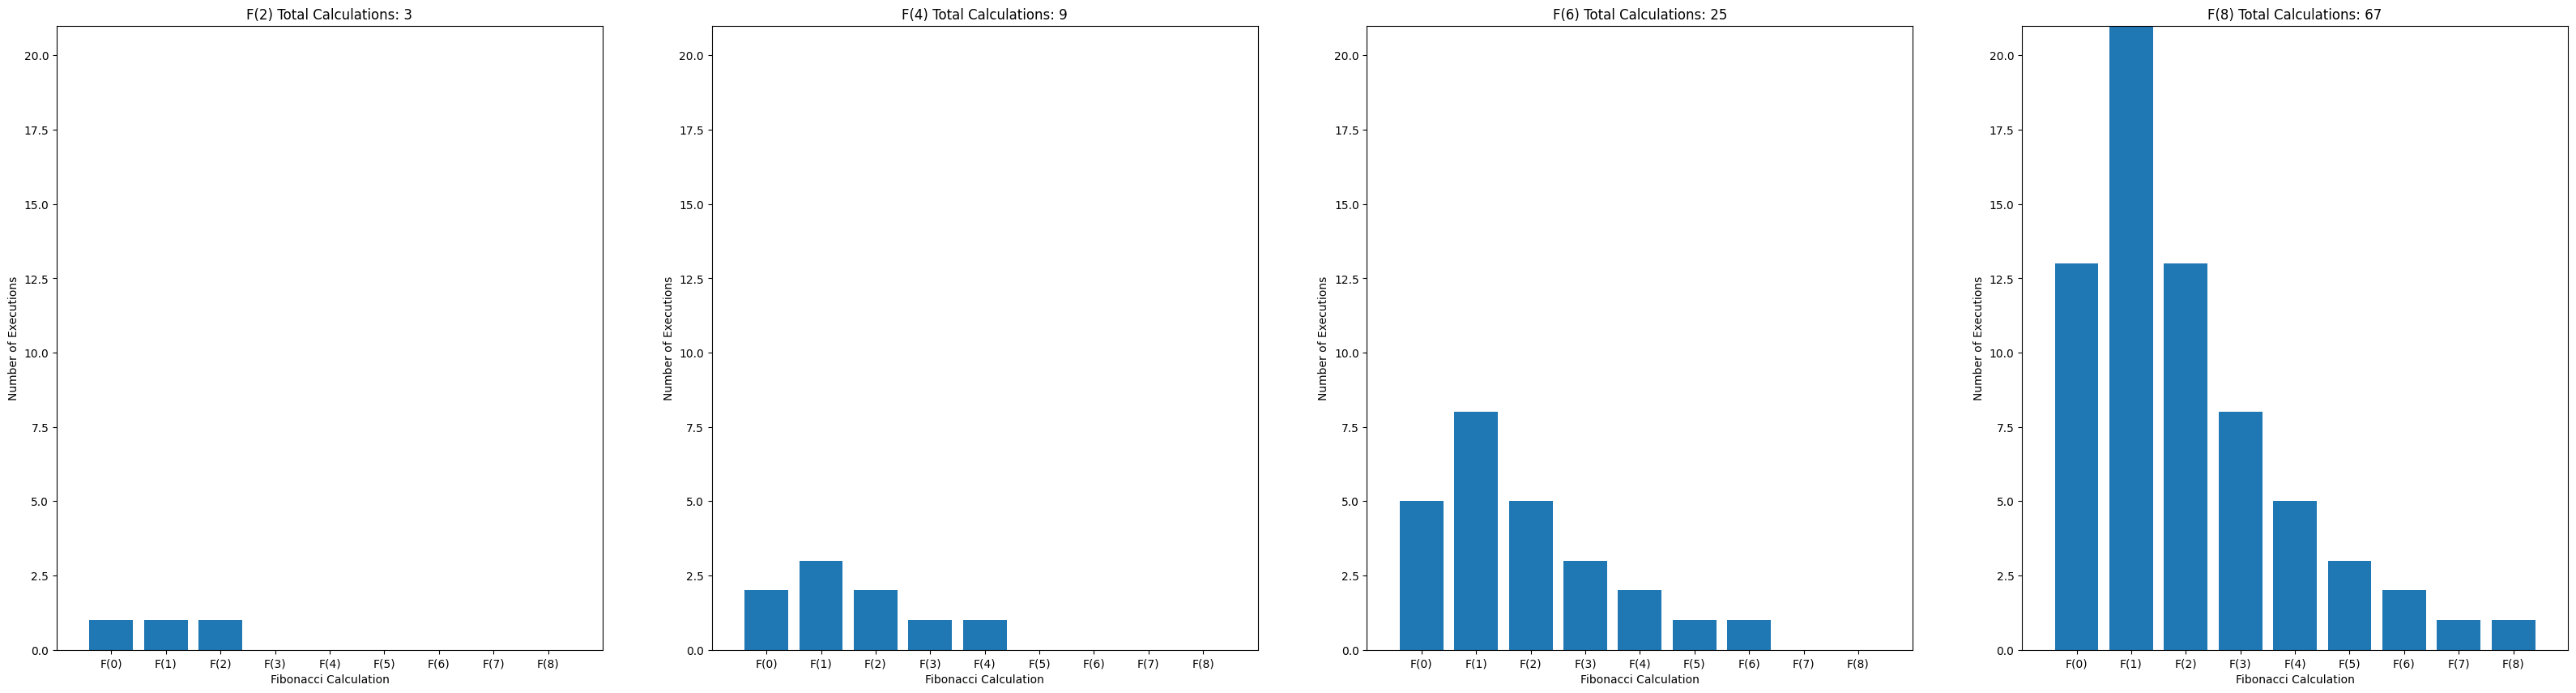

In [100]:
def draw_fibonacci_boxes(n, depth=0, txt=[]):
    # Same function as above but this time storing print statements to a text object for visualization
    if n < 2:
        txt.append("| " * depth + f"= {n}")
        return n
    else:
        txt.append("| " * depth + f"+--- Calculate F({n-1})")
        fib_n_1 = draw_fibonacci_boxes(n - 1, depth + 1, txt)
        txt.append("| " * depth + f"+--- Calculate F({n-2})")
        fib_n_2 = draw_fibonacci_boxes(n - 2, depth + 1, txt)
        result = fib_n_1 + fib_n_2
        txt.append("| " * depth + f"= {result}")
        return result

n_vals = [2, 4, 6, 8]

# Create a subplot for each n value
fig, ax = plt.subplots(1, len(n_vals), figsize=(40, 10))

# Loop over a set of n values to compute and visualize
y_max = 0
for n in n_vals:

    # Compute and visualize Fibonacci of n
    # n = 8
    output_txt = [f"+--- Calculate F({n})"]
    output_txt.append(f"Fibonacci({n}) = {draw_fibonacci_boxes(n, 1, output_txt)}")

    # Join the text list to a single string with charriage returns as delimiter
    output_string = "\n".join(output_txt)

    # Only print the last calculation
    if n == max(n_vals):
        print(output_string)

    # Loop over all numbers from n to zero and count the occurances of the calculations
    count = []
    for i in range(n+1):
        count.append(output_string.count(f"F({i})"))
    
    if max(count) > y_max:
        y_max = max(count)

    # Plot a histogram of occurances of each fibonnaci calculation
    ax[n_vals.index(n)].bar(range(n+1), count)
    ax[n_vals.index(n)].set_xlabel("Fibonacci Calculation")
    ax[n_vals.index(n)].set_ylabel("Number of Executions")
    ax[n_vals.index(n)].set_title(f"F({n}) Total Calculations: {output_string.count('F(')}")

# Define fixed ticks and limits for all subplots
for a in ax:
    a.set_ylim(0, y_max)
    a.set_xlim(-1, max(n_vals)+1)
    a.set_xticks(range(max(n_vals)+1), [f"F({i})" for i in range(max(n_vals)+1)])

plt.show()


<div class="alert alert-block alert-info">
<b>Q2.3 Response Here</b>

One way to improve the computation is to work from 0 up to N and remember the values of F(n) that you compute along the way instead of recursively continuing computing each F(n) from scratch. This would make it such that each F(n) calculation shown in the plots above are only ever executed a single time to arrive at the final solution. I suspect it might be possible to implement this methodology as a recursive algorithm, but I would have to investigate further to be sure. Definitely you could implement it as an iterative function with a looping structure.
</div>

## Q3 (1 pt) find K-th smallest element


Find the k-th smallest element in an unsorted array

Given an unsorted array of numbers and k, you need to find the kth smallest number in the array.


Q3.1 Write the function to find the kth smallest element in an array

Q3.2 Discuss the complexity of your solution (Big O Notation)


**Sample Input**

   array=[1, 2, 3, 9, 4]

   k=2


**Sample Output**

   2



In [98]:
#Q3.1

def finKthSmallest(array, k):
    
    # Convert any lists to numpy arrays
    if type(array) == list:
        array = np.array(array)

    # Loop k times, finding a removing the minimum value each time
    for i in range(k):
        min_idx = np.argmin(array)
        min_val = array[min_idx]
        array   = np.delete(array, min_idx)

    # Return the last known min value
    return min_val

# Test the function
size  = 5
array = np.random.randint(0, 10, size)
k     = np.random.randint(0, size)

print(f'input  = {array}, k = {k}')
print(f'output = {finKthSmallest(array, k)}')


input  = [0 8 1 9 2], k = 4
output = 8


<div class="alert alert-block alert-info">
<b>Q3.2 Response Here</b>

The time complexity of this solution is O(k*n) where k is the kth minimum value and n is the length of the array. The O(n) part comes from finding the minimum value in the array -> the np.argmin() function. This function must loop over the entire array and store the index of the minimum value that was found. Getting the min_val and deleting the element from the numpy array are both O(1) and thus are negligable for worst-case big O notation. The O(k) part comes from needing to repeat this process k times in order to find the kth minimum number. 
</div>

## Q4 (2 pt) Arrays - three number sum



Q4.1 Create a function that takes a non-empty array of distinct integers and an integer representing a target sum. The function should find all triplets in the array that sum up to the target sum and return a two-dimensional array of all these triplets.

Q4.2 Discuss the complexity of your solution (Big O Notation)

**Sample Input**

array = [12, 3, 1, 2, -6, 5, -8, 6]

targetSum=0


**Sample Output**
[[-8,2,6], [-8,3,5], [-6,1,5]]

In [101]:
#Q4.1
def threeNumberSum(array, targetSum):
    
    output = []

    # Loop over each element in the array except the last 2
    for i in range(len(array)-2):

        # Loop over remaining elements after the ith element except for the last one
        for j in range(i+1,len(array)-1):

            # Loop over remaining elements after the jth element
            for k in range(j+1,len(array)):

                # Check if the sum of the three elements is equal to the target sum
                if array[i] + array[j] + array[k] == targetSum:

                    # Append elements to output list
                    output.append([array[i], array[j], array[k]])

    return output


threeNumberSum([12, 3, 1, 2, -6, 5, -8, 6], 0)

[[3, 5, -8], [1, -6, 5], [2, -8, 6]]

<div class="alert alert-block alert-info">
<b>Q4.2 Response Here</b>

The complexity of this algorithm is O(n^3) because of the nested loops. The outer-most loop is clearly O(n-2), which simplifies to O(n) for big O notation. The middle loop is O(n-1-i) where i is the current value from the outer-most loop. This term also would simplify to O(n) for big O notation. Finally the inner-most loop is O(n-j) where j is the current value from the middle loop. This also simplifies to O(n) for big O notation. Now, since they are all nested loops, we can multiply their complexities together to get O(n\*n\*n) ~ O(n^3). The precise derivation/proof of this actually involves the very difficult evaluation of complex nested summations and is not necessary to describe in full detail -> conceptually, though, the explaination above is clear to why the complexity goes by the cube of N since we have triple-nested for loops to look over the comparison of every element triplet. 

Another way to think of it is to use the known formula for N choose 3 (number of unique triplets in a population of size N). This equation is shown below:

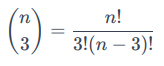

And if we expand this polynomial:

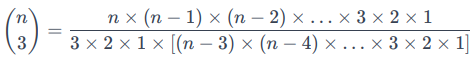

You can see above that the (n-3) and below terms cancel out in the numerator and denominator and the equation simplifies to:

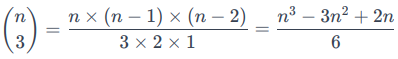

And since we only care about the highest order terms for big O notation, this simplifies down to O(n^3) time complexity

</div>

## Q5 (2 pt.) Find common elements


Q5.1 Write a function to find common elelmenet in three sorted arrays

Q5.2 Discuss the complexity of your solution (Big O Notation)

Note: Given three arrays sorted in non-decreasing order, print all common elements in these arrays

**Sample Input**

input1 = [1, 5, 10, 20, 40, 80]

input2 = [6, 7, 20, 80, 100]

input3 = [3, 4, 15, 20, 30, 70, 80, 120]


**Sample Output**

Output: [20, 80]

In [104]:
#Q5.1
def commomElements(array1,array2,array3):
   
   output = []

   # Loop over elements in the first array
   for idx_1 in range(len(array1)):

      idx_2 = 0
      idx_3 = 0

      # Loop until find matches
      while idx_2 < len(array2) and idx_3 < len(array3):
         
         # Check if all elements match
         if array1[idx_1] == array2[idx_2] and array1[idx_1] == array3[idx_3]:

            # Append to output list and break while loop
            output.append(array1[idx_1])
            break

         # Else if any element in array 2 or 3 is greater than the current element in array 1, we know we will never find a match because the arrays are sorted, so break the loop early
         elif array2[idx_2] > array1[idx_1] or array3[idx_3] > array1[idx_1]:
            break

         else: # Else we need to look at different elements in arrays 2 and 3

            # Increment the index of the array with the smallest value
            if array2[idx_2] < array3[idx_3] and idx_2 < len(array2) - 1:
               idx_2 += 1
            else:
               idx_3 += 1

   return output

commomElements([1, 5, 10, 20, 40, 80], [6, 7, 20, 80, 100], [3, 4, 15, 20, 30, 70, 80, 120])

[20, 80]

<div class="alert alert-block alert-info">
<b>Q5.2 Response Here</b>


</div>

## Q6 (2 pts) Missing Numbers

Q6.1 You are given an unordered list of unique integers `nums` in the range [1,n], where `n` represent the length of `nums + 2`. This means that two numbers in this range are missing from the list.

write a function that takes in this list and return a new list with the two missing numbers, sorted numerically.

Q6.2 Discuss the complexity of your solution (Big O Notation)

**Sample Input**

nums = [1,4,3]

Sample Output

[2,5]


In [116]:
def missingNumbers0nums(nums):

  # Create a numpy array of all numbers from 1 to len(nums) + 2
  all_nums = np.arange(1, len(nums) + 2 + 1)

  # Remove the indices of the numbers from the all_nums array (don't need to check anything here since nums is said to be unique integers)
  all_nums = np.delete(all_nums, [num - 1 for num in nums])

  return all_nums.tolist()

nums = [1, 4, 3]
missingNumbers0nums(nums)

[2, 5]

<div class="alert alert-block alert-info">
<b>Q6.2 Response Here</b>

The complexity of this solution is simply O(n). The first line in the function is O(n) because we are creating an array of size n and the second line is O(n) because for each number in the nums array we must perform a deletion operation on the all_nums array. This deletion operation is O(1) complexity so the final complexity is O(n + n\*1) = O(2n) ~ O(n) -> where n is the length of the nums array.

</div>


## Q7 (1 pt.) Pandas dataframe (Library)

https://drive.google.com/file/d/1WwaaC5U4GJyyRCv74W-t_C2ngpCGPBok/view?usp=sharing

Download the above csv file and read it as pandas dataframe

In [243]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1WwaaC5U4GJyyRCv74W-t_C2ngpCGPBok")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [244]:
# drop Row ID from dataframe
df = df.drop("Row ID", axis=1)

df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

Use matplotlib to plot any 5 different types of visualizations

C:\Users\knopp\AppData\Local\Temp\ipykernel_31972\2130566236.py:53: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Order Date"])


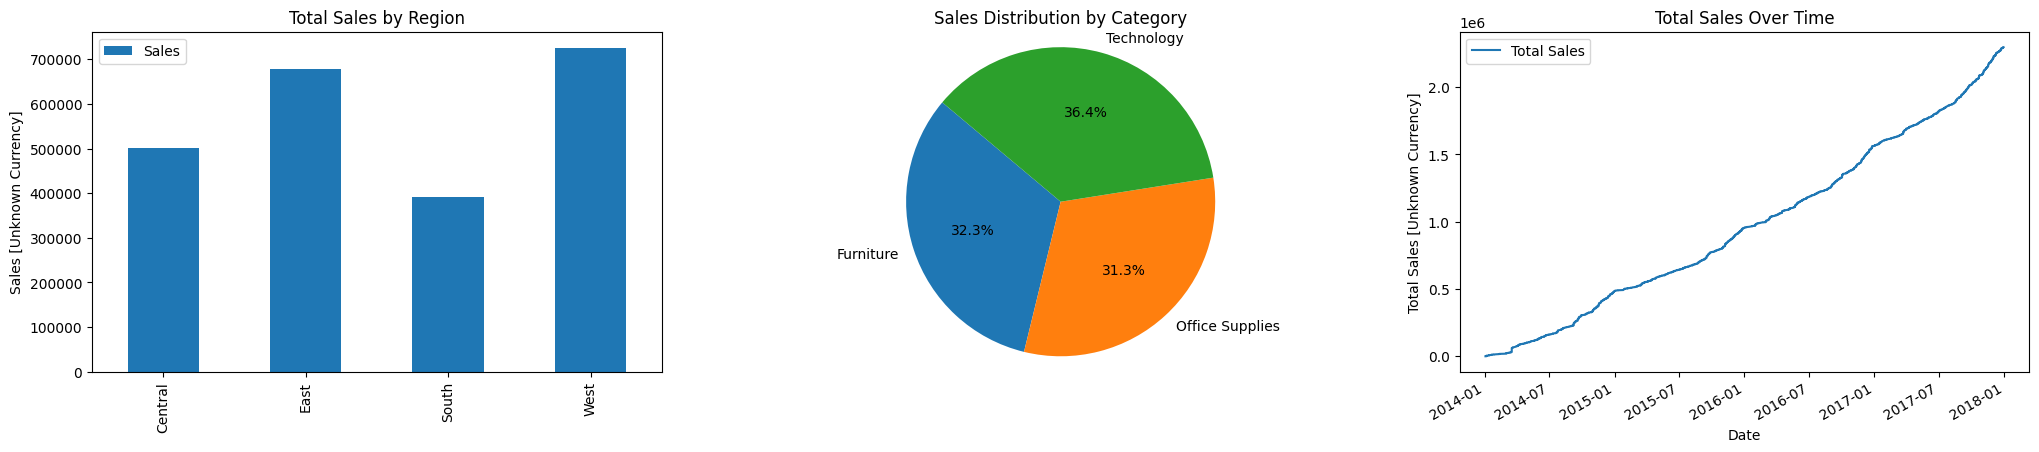

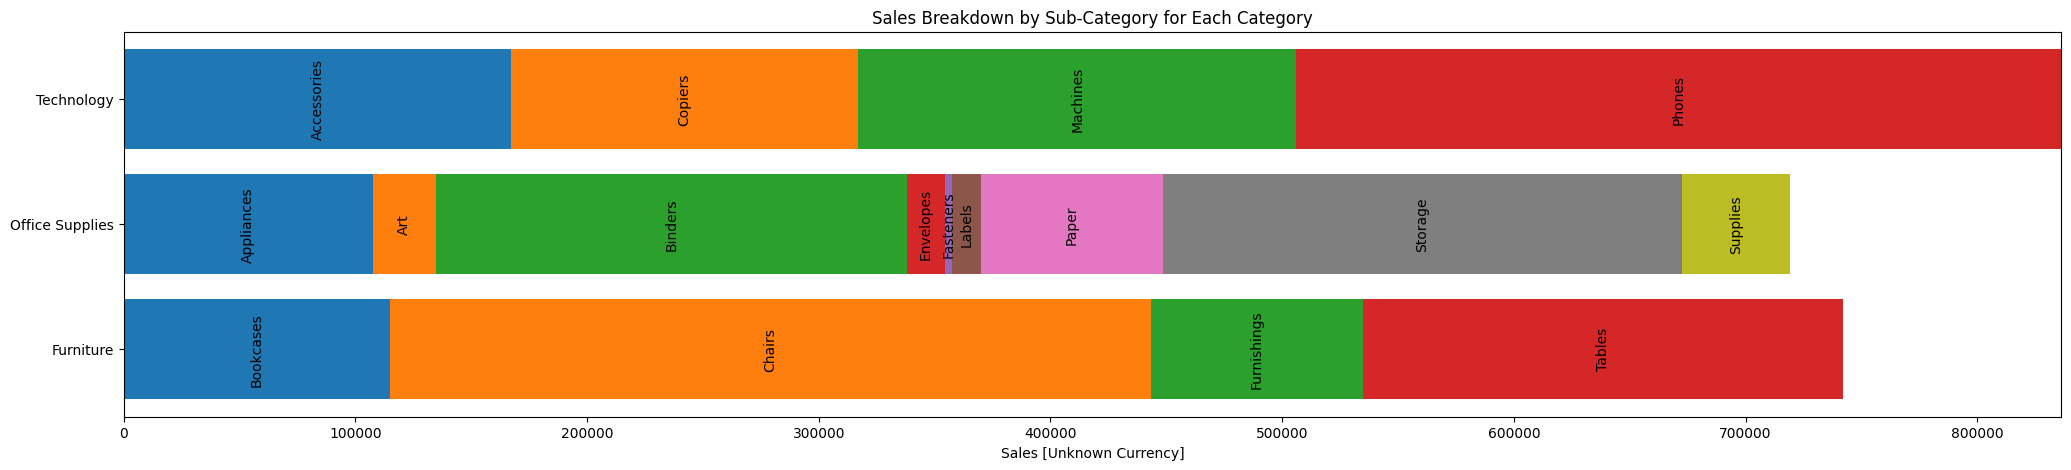

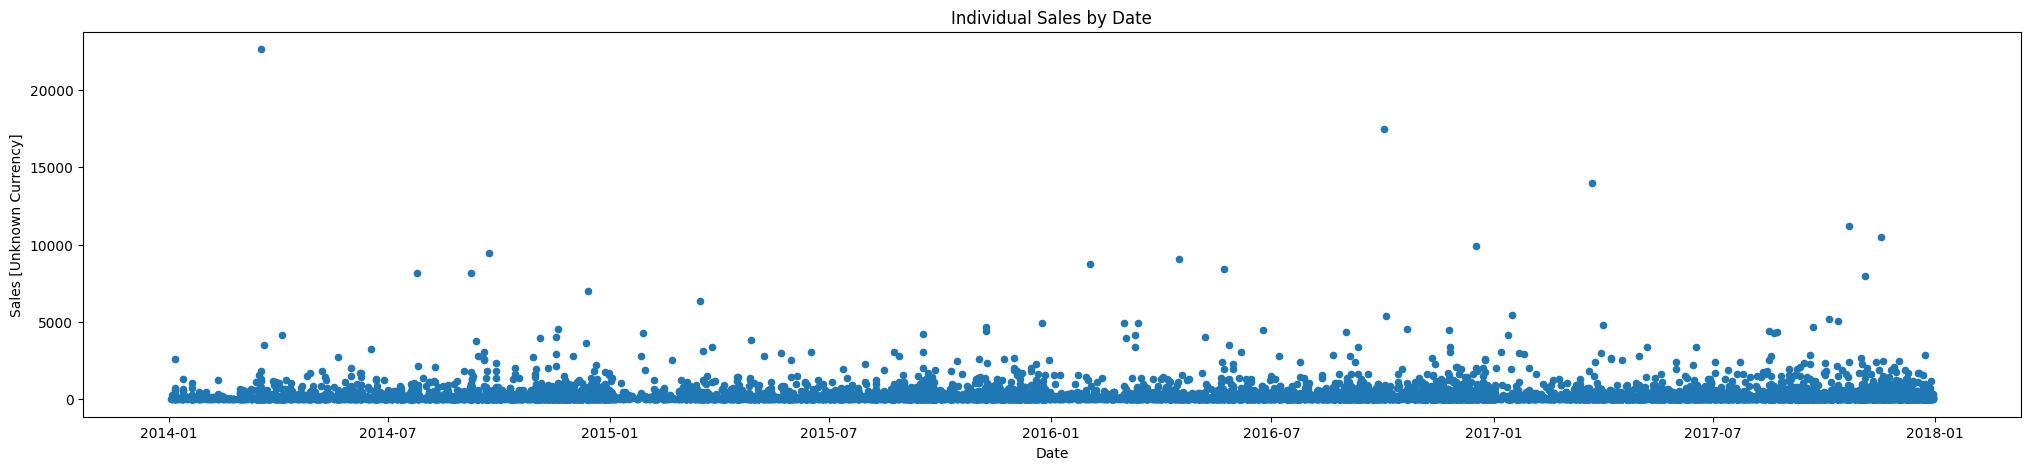

In [246]:
# Create a 1x5 subplot
fig, ax = plt.subplots(1, 3, figsize=(25, 5))

# Store regional sales as new data frame
df_region = df.groupby("Region").sum()["Sales"].reset_index()

# On the first subplot, create a bar chart for total sales by Region
df_region.plot(x="Region", y="Sales", kind="bar", ax=ax[0])
ax[0].set_title("Total Sales by Region")
ax[0].set_xlabel("")
ax[0].set_ylabel("Sales [Unknown Currency]")

# Store sales by category as new data frame
df_category = df.groupby("Category").sum()["Sales"].reset_index()

# On the second subplot, create a pie chart for sales by category
pie_labels = df_category["Category"]
pie_sizes = df_category["Sales"]

# Create a pie chart with labels
ax[1].pie(pie_sizes, labels=pie_labels, autopct='%1.1f%%', startangle=140)
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1].set_title("Sales Distribution by Category")

# Create a dictionary for sales by sub-category within each category
df_subs = {category: {"sub-category": group["Sub-Category"].tolist()         ,
                      "sales"       : group["Sales"       ].tolist()         ,
                      "sales_cumsum": group["Sales"       ].cumsum().tolist(),
                      "num_subs"    : len(group)                             ,} for category, group in df.groupby(["Category", "Sub-Category"]).sum().reset_index().groupby("Category")}

# Get the maximum numbe of sub-categories for any category
max_num_subs = max([df_subs[key]["num_subs"] for key in df_subs.keys()])

# Create a new figure for this plot
plt.figure(figsize=(25,5))

# Plot horizontal stacked bars for each category
for i in range(max_num_subs):
    keys    = [key for key in df_subs.keys()]
    vals    = [df["sales"][i] if i < df["num_subs"] else 0 for df in df_subs.values()]
    labels  = [df["sub-category"][i] if i < df["num_subs"] else "" for df in df_subs.values()]
    offsets = [0 if i == 0 else df["sales_cumsum"][i-1] if i < df["num_subs"] else df["sales_cumsum"][df["num_subs"]-1] for df in df_subs.values()]
    plt.barh(keys, vals, left=offsets)
    
    # Add vertical text labels centered on each bar
    for j in range(len(df_subs.keys())):
        plt.text(offsets[j] + vals[j]/2, j, labels[j], ha="center", va="center", rotation=90)

plt.title("Sales Breakdown by Sub-Category for Each Category")
plt.xlabel("Sales [Unknown Currency]")

# Convert the Order Date column to a datetime object
df["Date"] = pd.to_datetime(df["Order Date"])

# Sort the dataframe by date
df = df.sort_values("Date")

# Compute the running total of sales over time
df["Total Sales"] = df["Sales"].cumsum()

# On the third subplot, create a plot of total sales over time
df.plot(x="Date", y="Total Sales", ax=ax[2])
ax[2].set_title("Total Sales Over Time")
ax[2].set_xlabel("Date")
ax[2].set_ylabel("Total Sales [Unknown Currency]")


# On a new figure, plot the individual sales by date
fig, ax = plt.subplots(1, 1, figsize=(25, 5))
df.plot(x="Date", y="Sales", ax=ax, kind="scatter")
ax.set_title("Individual Sales by Date")
ax.set_xlabel("Date")
ax.set_ylabel("Sales [Unknown Currency]")

plt.show()


<div class="alert alert-block alert-info">
<b>Plot 1 (Basic Bar Chart) Explaination</b>

For the first plot I just wanted to visualize the total saled by some geographic region. For this type of data a bar chart was a good choice as it allows me to directly compare the total sales by region by comparing the size of the bars.

<b>Plot 2 (Pie Chart) Explaination</b>

For the second plot I wanted to do a breakdown of how much of the total sales in the database came from each top-level category. For this data, a pie chart provides a good visualization and I added percentage values to help quantify the portions that are shown visually with the colored slices.

<b>Plot 3 (Line Chart) Explaination</b>

For the third plot I wanted to show general growth trends over time. A line chart was the logical choice for this as it allows you to see how the total sales increases over time. 

<b>Plot 4 (Stacked Bar Chart) Explaination</b>

For the fourth plot I wanted to take the idea from plot 2 a step farther and create a full breakdown of every sub-category within each of the top-level categories. For this, I chose a stacked bar chart as you can not only see how each category and sub-category compares to all the others, but also how much of each category a particular sub-category makes up. 

<b>Plot 5 (Scatter Plot) Explaination</b>

Lastly, I wanted to highlight specific dates when very large sales were made. For this I chose a scatter plot as it allows very easy visibility of the large sale outliers that are way up above the majority of the other points.

## Q8 (1 pt. Optional - EXTRA BONUS for the extra mile!) Numpy Problem

convert X and y to numpy arrays

In [ ]:
X =    [[1.        , 5.48813504, 3.95862519, 2.93585503],
       [1.        , 7.15189366, 2.6444746 , 2.39747569],
       [1.        , 6.02763376, 2.84022281, 1.38443809],
       [1.        , 5.44883183, 4.62798319, 2.34158753],
       [1.        , 4.23654799, 0.35518029, 0.35482328],
       [1.        , 6.45894113, 0.4356465 , 1.91976306],
       [1.        , 4.37587211, 0.10109199, 0.43005986],
       [1.        , 8.91773001, 4.16309923, 2.83400675],
       [1.        , 9.63662761, 3.89078375, 1.56554497],
       [1.        , 3.83441519, 4.35006074, 1.24398582]]

Y = [31.57893529, 29.18364488, 32.23954906, 27.27249463, 19.45220674,25.11674737, 22.3990005 , 39.85283315, 36.98487066, 26.19423235]

X = # your code here
y = # your code here

Calculate coefficients for linear regression line using formula of coefficients are given by
 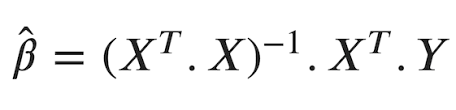

use np.linalg.inv to calculate inverse.

In [ ]:
# find X transpose
X_t = # your code here

# calculate coefficient using equation given above
coefficients = # your code here

# Extract the intercept and coefficients
intercept = coefficients[0]
coef_X1, coef_X2, coef_X3 = coefficients[1:]

# Print the coefficients
print("Intercept:", intercept)
print("Coefficient for X1:", coef_X1)
print("Coefficient for X2:", coef_X2)
print("Coefficient for X3:", coef_X3)

In [ ]:
# Predict using the calculated coefficients
predicted_Y = X @ coefficients

# Plot the data
plt.scatter(Y, predicted_Y)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Multiple Linear Regression")
plt.show()
